Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import statsmodels.api as sm
from pandas_profiling import ProfileReport
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
%matplotlib inline

#default theme
plt.style.use('ggplot')
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
plt.rcParams['figure.figsize'] =[8,8]
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'sans-serif'

## show maximum rows
pd.set_option('display.max_rows', None)

In [2]:
## Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score

In [3]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", skiprows = 1)

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
## checking the number of rows and columns of the data
df.shape

(246, 14)

So, we are having 264 rows and 14 columns in our dataset

In [6]:
df.describe(include = 'all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


From this describe() function it can be observed that there was fire and the supporting features were:
* Day - 01
* month - july
* year - 2012
* Temperature : 35 degree
* Relative Humidity: 64
* Wind speed: 14
* Rain: 0 means- no rain
* Fine Fuel Moisture Code : 88.9
* Duff Moisture Code: 7.9
* Drought Code : 8
* Initial Spread Index: 1.1
* Buildup Index: 3
* Fire Weather Index: 0.4
* class: Fire

### As in our dataset in the middle we are having another dataset combined named siddi-bel's ames dataset and then again names of the columns, we will just remove those rows, and clean that part.

In [7]:
df = df.drop(labels=122, axis=0)
df = df.drop(labels=123, axis=0)

In [8]:
df.shape

(244, 14)

### Now the rows have changed to 244

In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

### Again, as we can see there is some extra space between some strings which are the names of our columns, so we will remove that for the simplicity purpose.

In [10]:
df.columns = df.columns.str.replace(" ", "")

In [11]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [12]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


In [14]:
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


No duplicate data is found

so, we can see here that the data even though looks numerical but it is present as object type, we have to handle that as well.

In [15]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

### So, it looks like we have 1 missing value in our feature Classes

In [16]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

C:\Users\Rohit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Class Distributions \n 0: No Fire || 1: Fire')

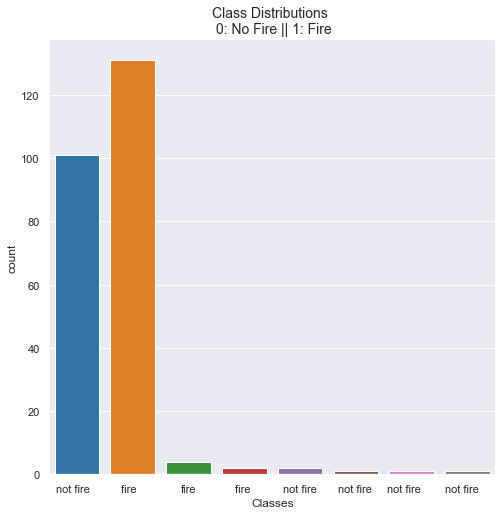

In [17]:
sns.countplot('Classes', data=df, palette="tab10")
plt.title('Class Distributions \n 0: No Fire || 1: Fire', fontsize=14)

## First let's convert the dtypes and before that split our dataset

## For now we will make Classes as our target varaiable for classification task and then again we will encode at later stage this classes variable and make Temperature variable our target variable for the regression task

### First for the Classification task

In [18]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5


In [20]:
y.head()

0    not fire   
1    not fire   
2    not fire   
3    not fire   
4    not fire   
Name: Classes, dtype: object

## We will not do any changes in out target variable except handle that one missing value, but before we will do some Feature engineering on the X which are our independent variables

In [21]:
X.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
dtype: object

## First let's convert object into numeric values

In [22]:
X['day']         = X['day'].astype('float')
X['month']       = X['month'].astype('float')
X['year']        = X['year'].astype('float')
X['Temperature'] = X['Temperature'].astype('float')
X['RH']          = X['RH'].astype('float')
X['Ws']          = X['Ws'].astype('float')
X['Rain']        = X['Rain'].astype('float')
X['FFMC']        = X['FFMC'].astype('float')
X['DMC']         = X['DMC'].astype('float')
#X['DC']          = X['DC'].astype('float')
X['ISI']         = X['ISI'].astype('float')
X['BUI']         = X['BUI'].astype('float')
#X['FWI']         = X['FWI'].astype('float')

C:\Users\Rohit\AppData\Local\Temp\ipykernel_18396\2850369785.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rohit\AppData\Local\Temp\ipykernel_18396\2850369785.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rohit\AppData\Local\Temp\ipykernel_18396\2850369785.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

### As in Drought code (DC) and Fire weather index (FWI) are having a problem in string formatting so before converting them to float we need to handle this issue.

In [23]:
X.dtypes

day            float64
month          float64
year           float64
Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
dtype: object

In [24]:
X["DC"] = X["DC"].str.replace(" ", "")

C:\Users\Rohit\AppData\Local\Temp\ipykernel_18396\4090105522.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### In Drought code (DC) there was extra space in one column in the values which was giving us the issue

In [25]:
X['DC'] = X['DC'].astype('float')

C:\Users\Rohit\AppData\Local\Temp\ipykernel_18396\3030757287.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
## So, it looks like FWI is filled as string fire by mistake
X[X['FWI'] == 'fire']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI


#### So, now we have two options, either change it using some values from the same column or simply remove it.

In [27]:
## Removing the value
X = X.drop(labels=167, axis=0)

In [28]:
X['FWI'] = X['FWI'].astype('float')

In [29]:
X.dtypes

day            float64
month          float64
year           float64
Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
dtype: object

### So, we have successfully converted the data into numeric one

### Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

$$VIF = \frac{1}{1-R^{2}}$$

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 10 indicates a high multicollinearity. 

In [30]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

        feature         VIF
0           day    1.487120
1         month    1.088510
2          year  514.359602
3   Temperature    2.415204
4            RH    2.764923
5            Ws    1.312931
6          Rain    1.551373
7          FFMC    4.120286
8           DMC   76.480443
9            DC   25.363045
10          ISI   23.122783
11          BUI  171.616713
12          FWI   40.471391


So, here we can see that `year`, `DMC`, `DC`, `ISI`, `BUI`, `FWI` are having multicollinearity, that is they are highly correlated, so we have to handle that also.

### Checking with OLS(Ordinary least square as well)

### Points to be considered

* For OLS we need our output value to be encoded in numerical format
* We need to handle the extra spaces in the classes column
* we have performed many operations on X which is our independent feature for now, due to which no. of rows have reduced, in this case we will remove one null value from the output and the shape will be managed, but this thing should always have to be in mind when dividing the dataset, as it can cause shape mismatch while prediction will be performed.

In [31]:
y.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [32]:
y = y.str.replace(" ", "")

In [33]:
y.unique()

array(['notfire', 'fire', nan], dtype=object)

In [34]:
## Removing the value
y = y.drop(labels=167, axis=0)

In [35]:
y.unique()

array(['notfire', 'fire'], dtype=object)

In [36]:
y_for_ols = y.map({'fire': 1, 'notfire': 0})

In [37]:
y_for_ols.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int64

In [38]:
## fit a OLS model with intercept on all features
X_ols_input = sm.add_constant(X)
model = sm.OLS(y_for_ols, X_ols_input).fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Classes   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     47.46
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           2.12e-55
Time:                        10:39:33   Log-Likelihood:                -22.996
No. Observations:                 243   AIC:                             71.99
Df Residuals:                     230   BIC:                             117.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
day            -0.0011      0.002     -0.470      0.638      -0.006       0.004
month          -0.0106      0.016     -0.643      0.521      -0.043       0.022
year           -0.0008      0.000     -4.203      0.000      -0.001      -0.000
Temperature    -0.0022      0.008     -0.287      0.774      -0.017       0.013
RH              0.0101      0.002      5.113      0.000       0.006       0.014
Ws             -0.0140      0.007     -1.952      0.052      -0.028       0.000
Rain            0.0215      0.011      1.969      0.050   -9.11e-06       0.043
FFMC            0.0224      0.002      9.029      0.000       0.018       0.027
DMC            -0.0216      0.012     -1.742      0.083      -0.046       0.003
DC             -0.0008      0.002     -0.430      0.668      -0.004       0.003
ISI             0.0260      0.020      1.277      0.203      -0.014       0.066
BUI             0.0150      0.016      0.925      0.356      -0.017       0.047
FWI             0.0304      0.015      2.022      0.044       0.001       0.060
==============================================================================
Omnibus:                        1.301   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.522   Jarque-Bera (JB):                1.225
Skew:                          -0.038   Prob(JB):                        0.542
Kurtosis:                       2.661   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
X_ols_input.iloc[:,1:].corr()

,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
month,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.065608,NaN,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895


# Now based on P-value, it should be smaller than 0.05, we will drop some values who will be having greater P-value

### In correlation map, we can see, that DMC is having 0.98 % correlation with BUI. So, we can drop one column. BUI is having a P-value of 0.356 and DMC(Duff Moisture) is having a P-value of 0.083. So, BUI(Build up index taken from FWI) can be dropped.

In [41]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [42]:
X = X.drop(labels = "BUI", axis = 1)

In [43]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,0.5
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,0.4
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,0.1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,0.5


### Again finding new OLS score after dropping the column

In [44]:
X_ols_input_new1 = sm.add_constant(X)
model = sm.OLS(y_for_ols, X_ols_input_new1).fit()

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Classes   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     51.73
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           4.36e-56
Time:                        10:39:33   Log-Likelihood:                -23.447
No. Observations:                 243   AIC:                             70.89
Df Residuals:                     231   BIC:                             112.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
day            -0.0011      0.002     -0.469      0.640      -0.006       0.004
month          -0.0116      0.016     -0.709      0.479      -0.044       0.021
year           -0.0008      0.000     -4.262      0.000      -0.001      -0.000
Temperature    -0.0024      0.008     -0.321      0.748      -0.017       0.012
RH              0.0103      0.002      5.247      0.000       0.006       0.014
Ws             -0.0139      0.007     -1.945      0.053      -0.028       0.000
Rain            0.0222      0.011      2.039      0.043       0.001       0.044
FFMC            0.0229      0.002      9.386      0.000       0.018       0.028
DMC            -0.0110      0.005     -2.304      0.022      -0.020      -0.002
DC              0.0007      0.001      0.767      0.444      -0.001       0.002
ISI             0.0222      0.020      1.113      0.267      -0.017       0.061
FWI             0.0342      0.014      2.363      0.019       0.006       0.063
==============================================================================
Omnibus:                        1.010   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.603   Jarque-Bera (JB):                1.026
Skew:                          -0.037   Prob(JB):                        0.599
Kurtosis:                       2.690   Cond. No.                     2.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
X_ols_input_new1.iloc[:,1:].corr()

,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI
month,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.082639
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.566670
RH,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.580957
Ws,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.032368
Rain,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.324422
FFMC,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.691132
DMC,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.875864
DC,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.739521
ISI,0.065608,NaN,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.922895


## Now again we can see that, ISI(initial spread index) and FWI(Fire weather index) is 0.92%, which is very strong, means we can use single one for the prediction purpose

### Now, checking the P-values, ISI is having P-value of 0.267 and FWI is having 0.019, so we will drop ISI column.

In [47]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,0.5
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,0.4
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,0.1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,0.5


In [48]:
X = X.drop(labels = "ISI", axis = 1)

In [49]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,FWI
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,0.5
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,0.4
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,0.5


### Again finding new OLS score after dropping the column

In [50]:
X_ols_input_new2 = sm.add_constant(X)
model = sm.OLS(y_for_ols, X_ols_input_new2).fit()

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Classes   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     56.72
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           1.03e-56
Time:                        10:39:33   Log-Likelihood:                -24.097
No. Observations:                 243   AIC:                             70.19
Df Residuals:                     232   BIC:                             108.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
day            -0.0014      0.002     -0.591      0.555      -0.006       0.003
month          -0.0108      0.016     -0.658      0.511      -0.043       0.022
year           -0.0009      0.000     -4.351      0.000      -0.001      -0.000
Temperature    -0.0020      0.008     -0.270      0.788      -0.017       0.013
RH              0.0099      0.002      5.127      0.000       0.006       0.014
Ws             -0.0128      0.007     -1.800      0.073      -0.027       0.001
Rain            0.0216      0.011      1.982      0.049       0.000       0.043
FFMC            0.0239      0.002     10.570      0.000       0.019       0.028
DMC            -0.0133      0.004     -3.087      0.002      -0.022      -0.005
DC              0.0003      0.001      0.396      0.692      -0.001       0.002
FWI             0.0487      0.006      7.989      0.000       0.037       0.061
==============================================================================
Omnibus:                        1.630   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.443   Jarque-Bera (JB):                1.443
Skew:                          -0.046   Prob(JB):                        0.486
Kurtosis:                       2.634   Cond. No.                     1.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
X_ols_input_new2.iloc[:,:].corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,FWI
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.350781
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.082639
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.566670
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.580957
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.032368
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.324422
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.691132
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.875864
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.739521


### DMC(Duff moisture code) is having 0.87 % correlation with DC and FWI. So, after looking in the P-value, DMC P-value is 0.002, DC P-value is 0.692, and FWI P-value is 0.000. So, we will be dropping DC column.

In [53]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,FWI
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,0.5
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,0.4
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,0.5


In [54]:
X = X.drop(labels = "DC", axis = 1)

In [55]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,FWI
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,0.5
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,0.4
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,0.1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,0.5


### Again finding new OLS score after dropping the column

In [56]:
X_ols_input_new3 = sm.add_constant(X)
model = sm.OLS(y_for_ols, X_ols_input_new3).fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Classes   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     63.23
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           1.36e-57
Time:                        10:39:33   Log-Likelihood:                -24.179
No. Observations:                 243   AIC:                             68.36
Df Residuals:                     233   BIC:                             103.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
day            -0.0012      0.002     -0.517      0.606      -0.006       0.003
month          -0.0095      0.016     -0.594      0.553      -0.041       0.022
year           -0.0009      0.000     -4.644      0.000      -0.001      -0.001
Temperature    -0.0017      0.007     -0.231      0.817      -0.016       0.013
RH              0.0101      0.002      5.422      0.000       0.006       0.014
Ws             -0.0123      0.007     -1.764      0.079      -0.026       0.001
Rain            0.0211      0.011      1.953      0.052      -0.000       0.042
FFMC            0.0240      0.002     10.623      0.000       0.020       0.028
DMC            -0.0122      0.003     -3.645      0.000      -0.019      -0.006
FWI             0.0487      0.006      8.000      0.000       0.037       0.061
==============================================================================
Omnibus:                        1.145   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                1.124
Skew:                          -0.042   Prob(JB):                        0.570
Kurtosis:                       2.678   Cond. No.                     1.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
X_ols_input_new3.iloc[:,:].corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,FWI
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.350781
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.082639
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.566670
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.580957
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.032368
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.324422
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.691132
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875864
FWI,0.350781,0.082639,NaN,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,1.000000


In [59]:
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="dark")

Text(0.5, 1.0, 'Correlation of the final values')

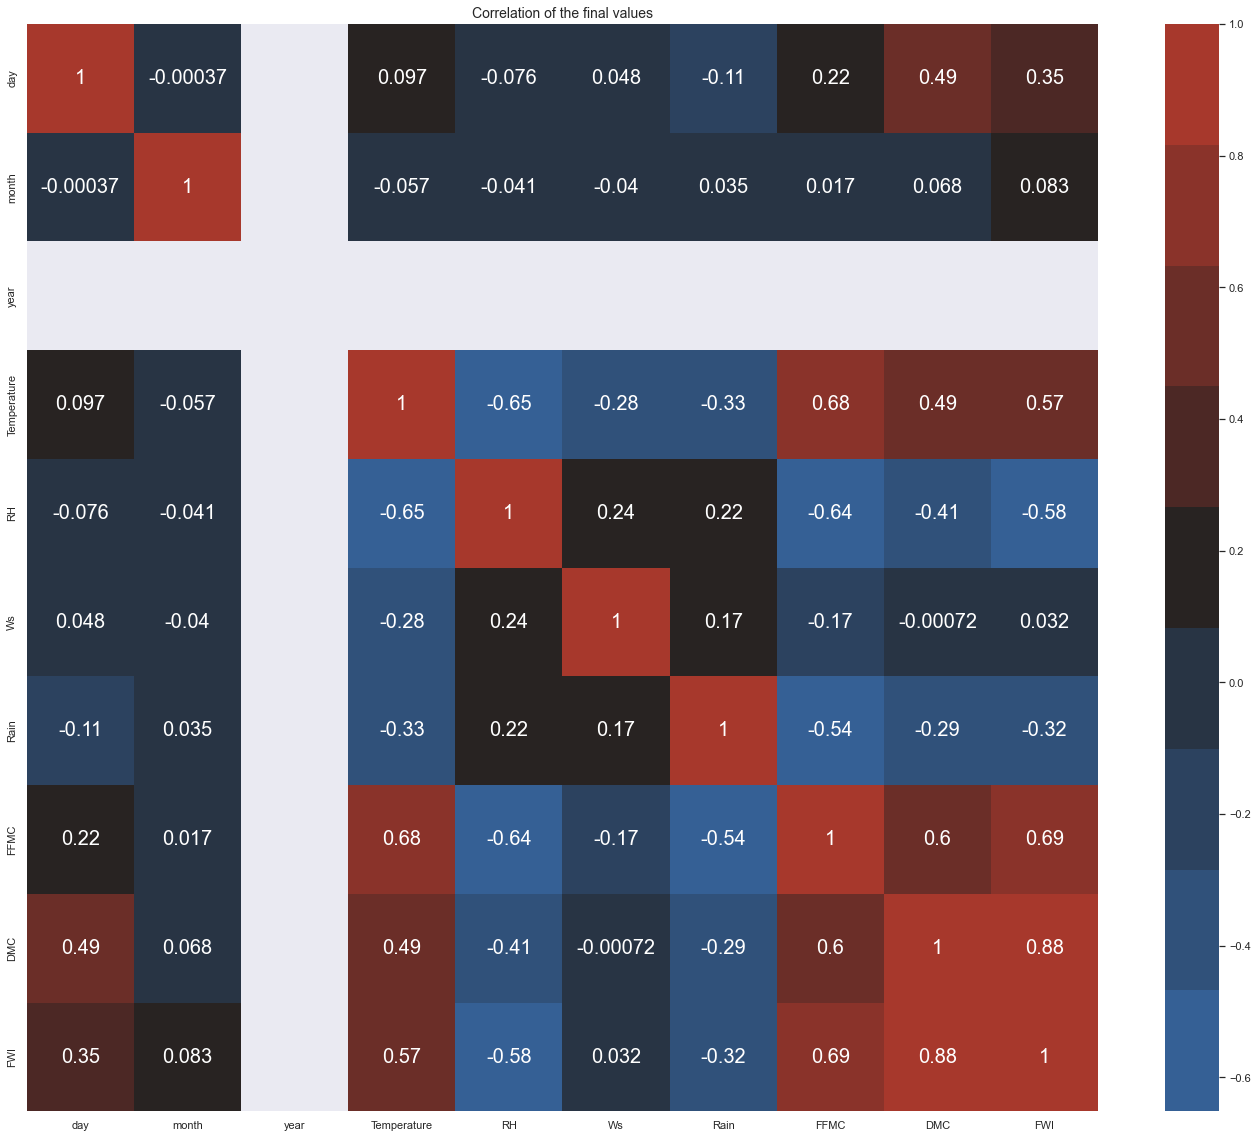

In [60]:
f, ax1, = plt.subplots(figsize=(24,20))
corr = X.corr()
sns.heatmap(data = corr, cmap=cmap, annot_kws={'size':20}, ax=ax1, annot = True)
ax1.set_title("Correlation of the final values", fontsize=14)

### Now the values looks quite good and we can proceed further

In [61]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,FWI
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,0.5
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,0.4
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,0.1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,0.5


In [62]:
y.head()

0    notfire
1    notfire
2    notfire
3    notfire
4    notfire
Name: Classes, dtype: object

In [63]:
y.value_counts()

fire       137
notfire    106
Name: Classes, dtype: int64

<AxesSubplot:ylabel='Classes'>

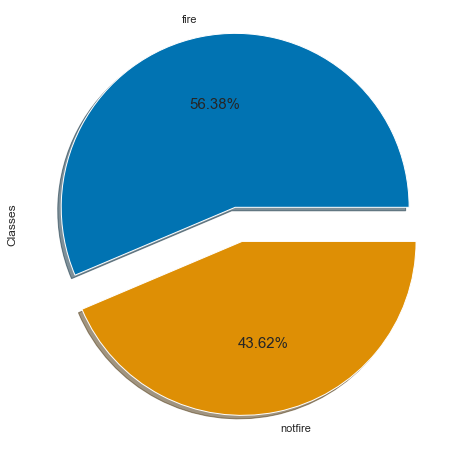

In [64]:
y.value_counts().plot.pie(explode = [0.1,0.1], autopct = "%1.2f%%", shadow = True)

<AxesSubplot:>

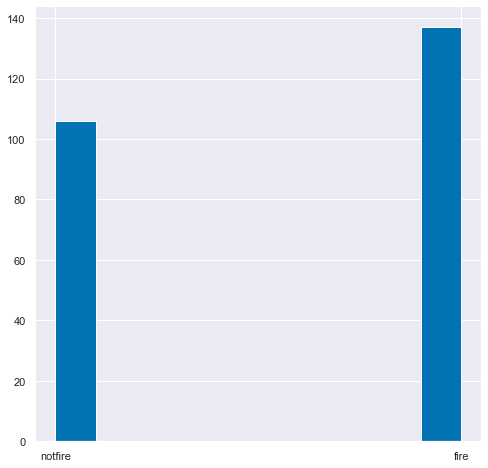

In [65]:
y.hist()

Output looks quite balanced

In [66]:
X.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'FWI'],
      dtype='object')

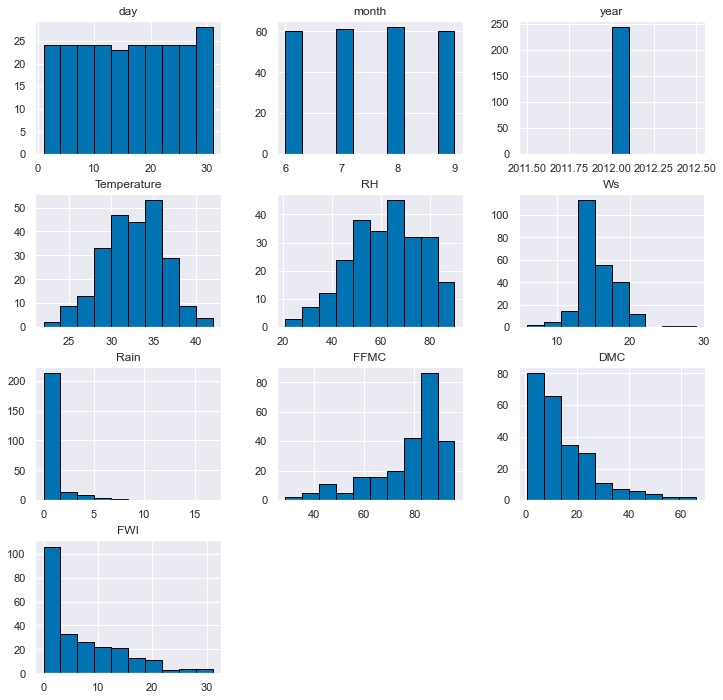

In [67]:
X.hist(edgecolor = 'black', figsize = (12,12));

### 'Temp' has a near Guassian Distribution. There are a mixture of positive skews and negative skews among the other attributes.

In [68]:
sns.set(style="white", palette="coolwarm", color_codes=True)

C:\Users\Rohit\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Rohit\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



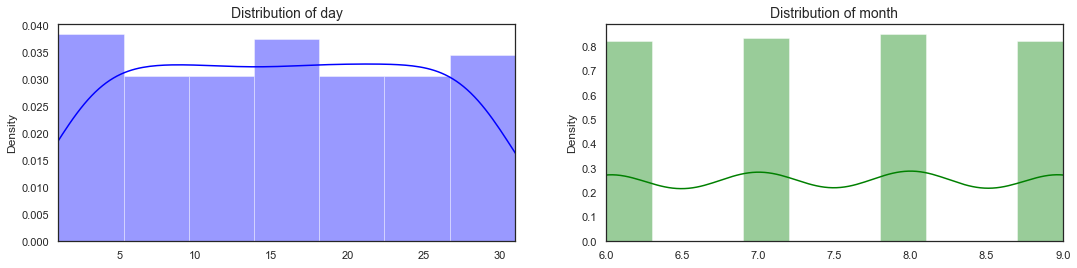

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
day = X['day'].values
month = X['month'].values
sns.distplot(day, ax=ax[0], color='blue')
ax[0].set_title('Distribution of day', fontsize=14)
ax[0].set_xlim([min(day), max(day)])
sns.distplot(month, ax=ax[1], color='green')
ax[1].set_title('Distribution of month', fontsize=14)
ax[1].set_xlim([min(month), max(month)])
plt.show()

C:\Users\Rohit\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Rohit\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Rohit\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



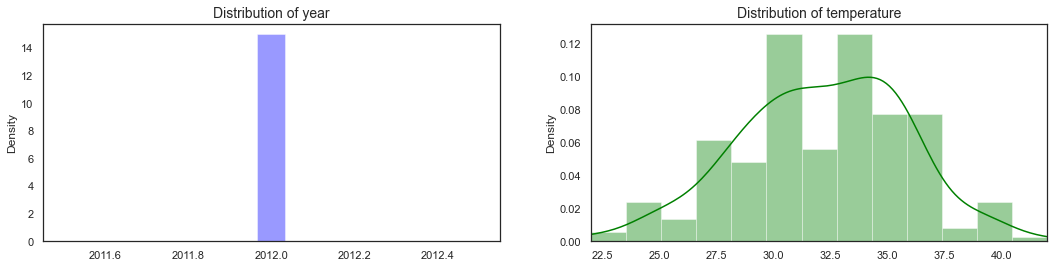

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
year = X['year'].values
temperature = X['Temperature'].values
sns.distplot(year, ax=ax[0], color='blue')
ax[0].set_title('Distribution of year', fontsize=14)
#ax[0].set_xlim([min(year), max(year)])
sns.distplot(temperature, ax=ax[1], color='green')
ax[1].set_title('Distribution of temperature', fontsize=14)
ax[1].set_xlim([min(temperature), max(temperature)])
plt.show()

C:\Users\Rohit\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Rohit\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



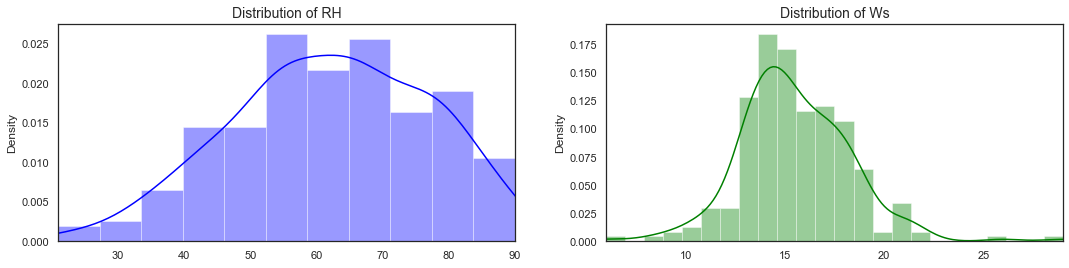

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
rh = X['RH'].values
ws = X['Ws'].values
sns.distplot(rh, ax=ax[0], color='blue')
ax[0].set_title('Distribution of RH', fontsize=14)
ax[0].set_xlim([min(rh), max(rh)])
sns.distplot(ws, ax=ax[1], color='green')
ax[1].set_title('Distribution of Ws', fontsize=14)
ax[1].set_xlim([min(ws), max(ws)])
plt.show()

C:\Users\Rohit\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Rohit\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



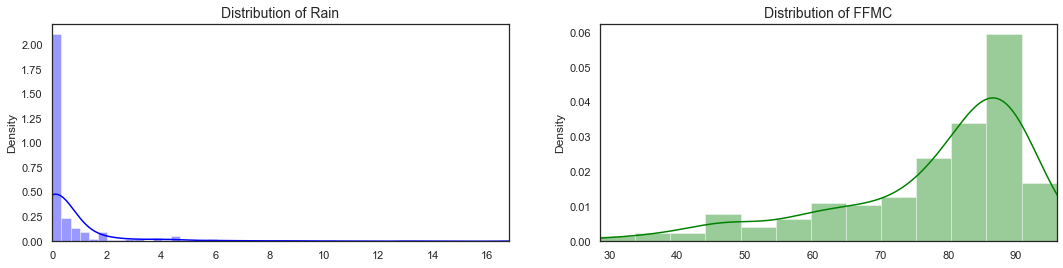

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
rain = X['Rain'].values
ffmc = X['FFMC'].values
sns.distplot(rain, ax=ax[0], color='blue')
ax[0].set_title('Distribution of Rain', fontsize=14)
ax[0].set_xlim([min(rain), max(rain)])
sns.distplot(ffmc, ax=ax[1], color='green')
ax[1].set_title('Distribution of FFMC', fontsize=14)
ax[1].set_xlim([min(ffmc), max(ffmc)])
plt.show()

C:\Users\Rohit\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Rohit\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



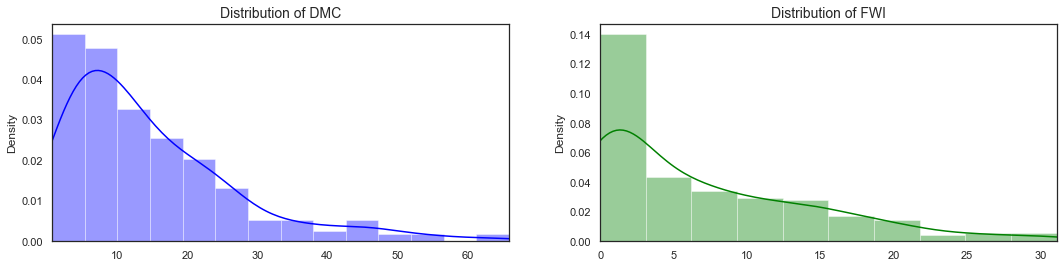

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
dmc = X['DMC'].values
fwi = X['FWI'].values
sns.distplot(dmc, ax=ax[0], color='blue')
ax[0].set_title('Distribution of DMC', fontsize=14)
ax[0].set_xlim([min(dmc), max(dmc)])
sns.distplot(fwi, ax=ax[1], color='green')
ax[1].set_title('Distribution of FWI', fontsize=14)
ax[1].set_xlim([min(fwi), max(fwi)])
plt.show()

In [74]:
X.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'FWI'],
      dtype='object')

In [75]:
y.head()

0    notfire
1    notfire
2    notfire
3    notfire
4    notfire
Name: Classes, dtype: object

Text(0.5, 1.0, 'Ws vs Target distribution')

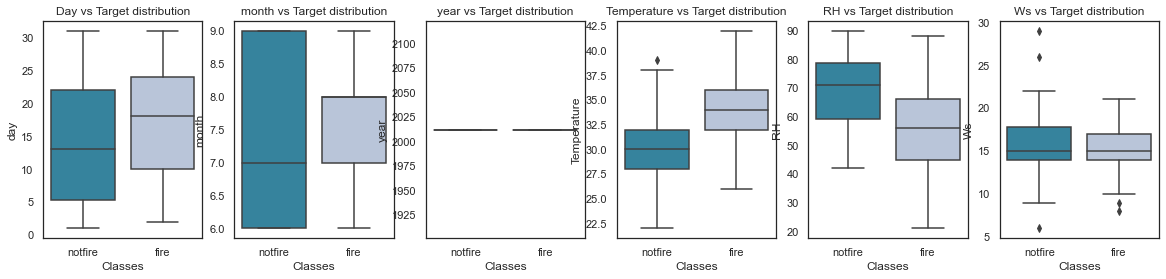

In [76]:
fig, axes = plt.subplots(ncols=6,figsize=(20,4))
sns.boxplot(x=y,y=X.day,palette='PuBuGn_r', ax=axes[0])
axes[0].set_title('Day vs Target distribution')

sns.boxplot(x=y,y=X.month, palette='PuBuGn_r', ax=axes[1])
axes[1].set_title("month vs Target distribution")

sns.boxplot(x=y,y=X.year, palette='PuBuGn_r', ax=axes[2])
axes[2].set_title("year vs Target distribution")

sns.boxplot(x=y,y=X.Temperature, palette='PuBuGn_r', ax=axes[3])
axes[3].set_title("Temperature vs Target distribution")

sns.boxplot(x=y,y=X.RH ,palette='PuBuGn_r', ax=axes[4])
axes[4].set_title("RH vs Target distribution")

sns.boxplot(x=y,y=X.Ws,palette='PuBuGn_r',ax=axes[5])
axes[5].set_title("Ws vs Target distribution")

Text(0.5, 1.0, 'FWI vs Target distribution')

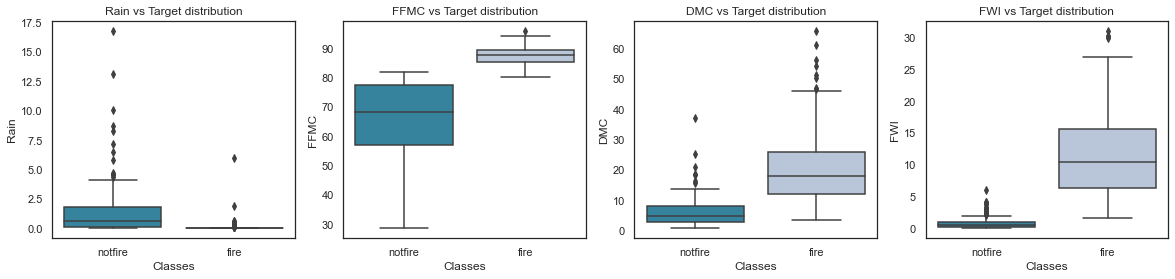

In [77]:
fig, axes = plt.subplots(ncols=4,figsize=(20,4))
sns.boxplot(x=y,y=X.Rain,palette='PuBuGn_r',ax=axes[0])
axes[0].set_title("Rain vs Target distribution")

sns.boxplot(x=y,y=X.FFMC,palette='PuBuGn_r',ax=axes[1])
axes[1].set_title("FFMC vs Target distribution")

sns.boxplot(x=y,y=X.DMC,palette='PuBuGn_r',ax=axes[2])
axes[2].set_title("DMC vs Target distribution")

sns.boxplot(x=y,y=X.FWI,palette='PuBuGn_r',ax=axes[3])
axes[3].set_title("FWI vs Target distribution")

### For outliers removal we will first use Robust Scaler and then Standard scaler

But before that we have also seen that year column is not of any use as it is just behaving as a constant, so we will remove it also.

In [78]:
X = X.drop(labels = "year", axis = 1)

In [79]:
X.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC',
       'FWI'],
      dtype='object')

In [80]:
scaler1 = RobustScaler()
robust_df = scaler1.fit_transform(X)
robust_df = pd.DataFrame(robust_df, columns = ['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'FWI'])

In [81]:
robust_df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,FWI
0,-1.000000,-2.0,-0.6,-0.285714,1.000000,0.0,-1.069909,-0.526667,-0.344186
1,-0.933333,-2.0,-0.6,-0.095238,-0.666667,2.6,-1.148936,-0.480000,-0.353488
2,-0.866667,-2.0,-1.2,0.904762,2.333333,26.2,-2.200608,-0.586667,-0.381395
3,-0.800000,-2.0,-1.4,1.238095,-0.666667,5.0,-3.325228,-0.666667,-0.390698
4,-0.733333,-2.0,-1.0,0.666667,0.333333,0.0,-1.124620,-0.553333,-0.344186


In [82]:
scaler2 = StandardScaler()
X_scaled = scaler2.fit_transform(robust_df)
X_scaled = pd.DataFrame(X_scaled, columns = ['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'FWI'])

In [83]:
X_scaled.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,FWI
0,-1.672796,-1.350168,-0.870655,-0.340673,0.893277,-0.381657,-0.847927,-0.912120,-0.880159
1,-1.559473,-1.350168,-0.870655,-0.070359,-0.888877,0.268642,-0.938709,-0.855520,-0.893626
2,-1.446150,-1.350168,-1.699254,1.348788,2.319000,6.171355,-2.146802,-0.984891,-0.934029
3,-1.332827,-1.350168,-1.975454,1.821837,-0.888877,0.868918,-3.438694,-1.081920,-0.947497
4,-1.219504,-1.350168,-1.423054,1.010896,0.180416,-0.381657,-0.910776,-0.944463,-0.880159


In [84]:
### Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=42)

In [85]:
X_train.shape

(182, 9)

In [86]:
y_train.shape

(182,)

In [87]:
X_test.shape

(61, 9)

In [88]:
y_test.shape

(61,)

In [89]:
X_train.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,FWI
97,-1.106181,1.346468,-0.870655,0.808160,1.249708,-0.331634,-0.142624,-0.895949,-0.826288
141,0.480340,-1.350168,-0.318255,0.673003,-0.532446,-0.281611,-1.232003,-0.879777,-0.907094
192,-0.539566,0.447590,2.167544,-2.097713,-0.176015,-0.381657,1.142285,0.632248,1.961500
68,-0.879535,0.447590,-0.042055,-0.137938,0.893277,-0.231588,-0.051842,-0.273350,-0.597340
119,1.386924,1.346468,-0.042055,-1.016458,-0.532446,-0.031496,-0.023910,-0.612949,-0.826288


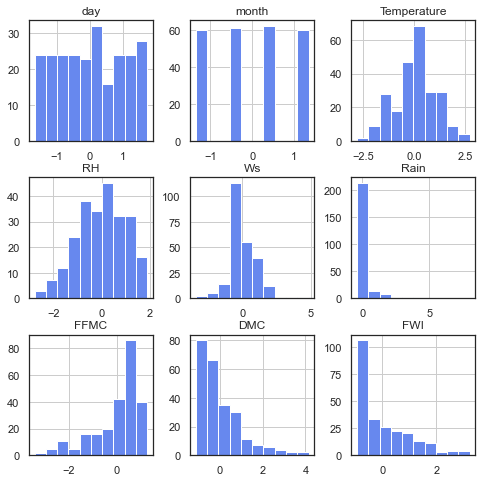

In [90]:
X_scaled.hist();

### We can see that the distributions have been adjusted. The median values are now zero and the standard deviation values are now close to 1.0.

In [91]:
X_scaled.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,FWI
count,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02
mean,1.005140e-17,4.989150e-16,-4.386066e-17,2.150772e-16,-5.334096e-17,-1.023415e-16,-3.837808e-17,4.066249e-17,8.817821e-17
std,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00
min,-1.672796e+00,-1.350168e+00,-2.804054e+00,-2.773497e+00,-3.383891e+00,-3.816569e-01,-3.438694e+00,-1.130434e+00,-9.474965e-01
25%,-8.795352e-01,-4.512889e-01,-5.944548e-01,-6.447762e-01,-5.324458e-01,-3.816569e-01,-4.184603e-01,-7.180634e-01,-8.532235e-01
50%,2.704827e-02,4.475898e-01,-4.205512e-02,6.479744e-02,-1.760152e-01,-3.816569e-01,3.811160e-01,-2.733499e-01,-3.818584e-01
75%,8.203088e-01,4.475898e-01,7.865444e-01,7.743711e-01,5.368462e-01,-1.315419e-01,7.302759e-01,4.947916e-01,5.945408e-01
max,1.726892e+00,1.346468e+00,2.719943e+00,1.889415e+00,4.814014e+00,8.022206e+00,1.267982e+00,4.141442e+00,3.240919e+00


### Now using algorithms for classification purpose

In [92]:
classifiers = {
    "Logisitic Regression": LogisticRegression(max_iter = 1000),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "BaggingClassifier" : BaggingClassifier(),
    "ExtraTreesClassifier" : ExtraTreesClassifier()
}

In [93]:
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv = 10)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 95.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 89.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 97.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 97.0 % accuracy score
Classifiers:  BaggingClassifier Has a training score of 96.0 % accuracy score
Classifiers:  ExtraTreesClassifier Has a training score of 96.0 % accuracy score


### Accuracy seems fine, still Let us perform Grid SearchCV and see what we get

In [94]:
# Logistic Regression 
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(probability = True), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# Decisiontree best estimator
tree_clf = grid_tree.best_estimator_

# Bagging Classifier
bag_parameters = {"base_estimator": [SVC(), RandomForestClassifier(), DecisionTreeClassifier()],
                 "n_estimators": [10,20,30,40,50,80,100]}
grid_bag = GridSearchCV(BaggingClassifier(), bag_parameters)
grid_bag.fit(X_train, y_train)

# Bag best parameters
bag_clf = grid_bag.best_estimator_


# Extra Trees classifier
extra_parameters = {"criterion": ["gini", "entropy"],
                   'n_estimators':list(range(1,100,1))}
extra_bag = GridSearchCV(ExtraTreesClassifier(), extra_parameters)
extra_bag.fit(X_train, y_train)

# Extra tree best parameter
extra_clf = extra_bag.best_estimator_

# Random Forest Classifier
Random_parameters = {"criterion": ["gini", "entropy", "log_loss"],
                     "n_estimators":list(range(1,100,1)),
                     "min_samples_leaf": list(range(5,7,1)),
                     "max_depth": list(range(2,4,1))}

Random_bag = GridSearchCV(RandomForestClassifier(), Random_parameters)
Random_bag.fit(X_train, y_train)

# random forest best parameter
random_clf = Random_bag.best_estimator_

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


1980 fits failed out of a total of 5940.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1980 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Rohit\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Rohit\Anaconda3\lib\site-pack

In [95]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv = 10)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv = 10)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv = 10)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv = 10)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

bagging_score = cross_val_score(bag_clf, X_train, y_train, cv = 10)
print('Bagging Classifier Cross Validation Score', round(bagging_score.mean() * 100, 2).astype(str) + '%')

extra_tree_score = cross_val_score(extra_clf, X_train, y_train, cv = 10)
print('ExtraTree Classifier Cross Validation Score', round(extra_tree_score.mean() * 100, 2).astype(str) + '%')

random_forest_score = cross_val_score(random_clf, X_train, y_train, cv = 10)
print('Random Forest Classifier Cross Validation Score', round(random_forest_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  96.75%
Knears Neighbors Cross Validation Score 87.87%
Support Vector Classifier Cross Validation Score 96.2%
DecisionTree Classifier Cross Validation Score 98.36%
Bagging Classifier Cross Validation Score 96.17%
ExtraTree Classifier Cross Validation Score 96.11%
Random Forest Classifier Cross Validation Score 97.25%


### By these values, we can see that Decision Tree is the best classifier. Now Let's see precision, recall, confusion matrix

### Logistic regression

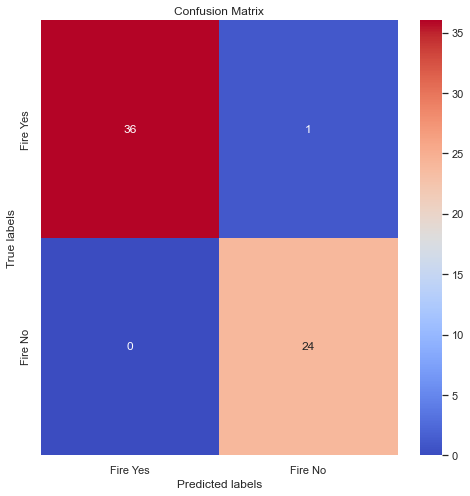

In [96]:
## Predicting the test results of Logistic Regression
y_predict_log_reg = log_reg.predict(X_test)
y_predict_log_reg
cm_log_reg = confusion_matrix(y_test, y_predict_log_reg)


ax = plt.subplot()


sns.heatmap(cm_log_reg, annot=True, ax = ax, fmt = '', cmap = 'coolwarm'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fire Yes', 'Fire No']); ax.yaxis.set_ticklabels(['Fire Yes', 'Fire No']);

In [97]:
print(classification_report(y_test, y_predict_log_reg))

              precision    recall  f1-score   support

        fire       1.00      0.97      0.99        37
     notfire       0.96      1.00      0.98        24

    accuracy                           0.98        61
   macro avg       0.98      0.99      0.98        61
weighted avg       0.98      0.98      0.98        61



### KNearest Neighbors 

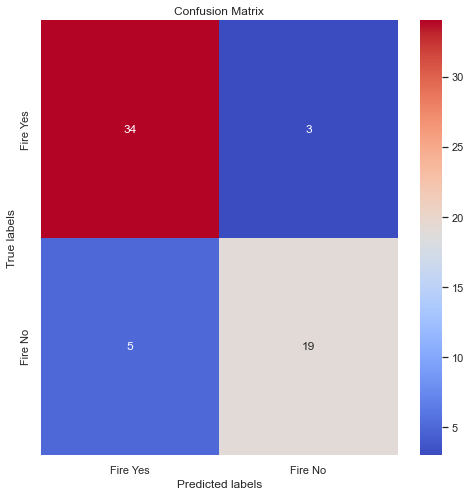

In [98]:
## Predicting the test results of KNearest Neighbors
y_predict_knn_predict = knears_neighbors.predict(X_test)
y_predict_knn_predict
cm_knn_predict = confusion_matrix(y_test, y_predict_knn_predict)


ax = plt.subplot()


sns.heatmap(cm_knn_predict, annot=True, ax = ax, fmt = '', cmap = 'coolwarm'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fire Yes', 'Fire No']); ax.yaxis.set_ticklabels(['Fire Yes', 'Fire No']);

In [99]:
print(classification_report(y_test, y_predict_knn_predict))

              precision    recall  f1-score   support

        fire       0.87      0.92      0.89        37
     notfire       0.86      0.79      0.83        24

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



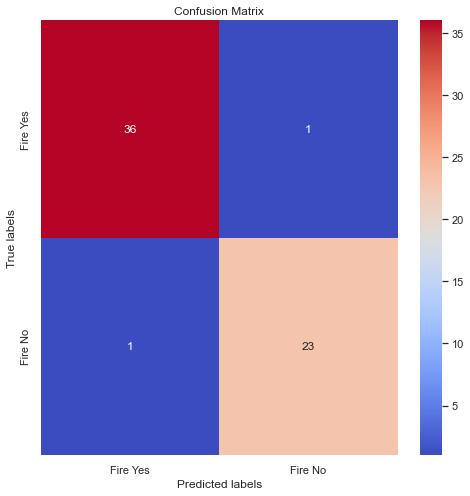

In [100]:
## Predicting the test results of Support Vector Classifier
y_predict_SVC_predict = svc.predict(X_test)
y_predict_SVC_predict
cm_svc_predict = confusion_matrix(y_test, y_predict_SVC_predict)


ax = plt.subplot()


sns.heatmap(cm_svc_predict, annot=True, ax = ax, fmt = '', cmap = 'coolwarm'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fire Yes', 'Fire No']); ax.yaxis.set_ticklabels(['Fire Yes', 'Fire No']);

In [101]:
print(classification_report(y_test, y_predict_SVC_predict))

              precision    recall  f1-score   support

        fire       0.97      0.97      0.97        37
     notfire       0.96      0.96      0.96        24

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



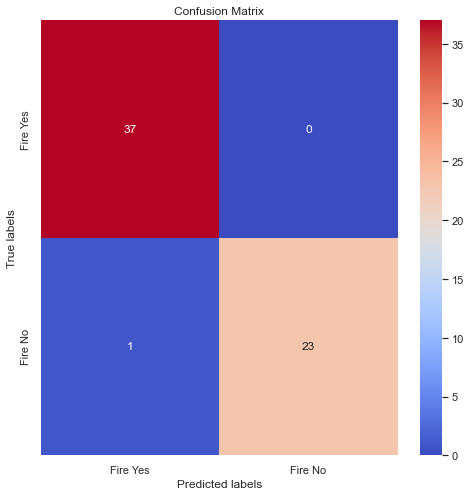

In [102]:
## Predicting the test results of Decision Tree Classifier
y_predict_tree_predict = tree_clf.predict(X_test)
y_predict_tree_predict
cm_tree_predict = confusion_matrix(y_test, y_predict_tree_predict)


ax = plt.subplot()


sns.heatmap(cm_tree_predict, annot=True, ax = ax, fmt = '', cmap = 'coolwarm'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fire Yes', 'Fire No']); ax.yaxis.set_ticklabels(['Fire Yes', 'Fire No']);

In [103]:
print(classification_report(y_test, y_predict_tree_predict))

              precision    recall  f1-score   support

        fire       0.97      1.00      0.99        37
     notfire       1.00      0.96      0.98        24

    accuracy                           0.98        61
   macro avg       0.99      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61



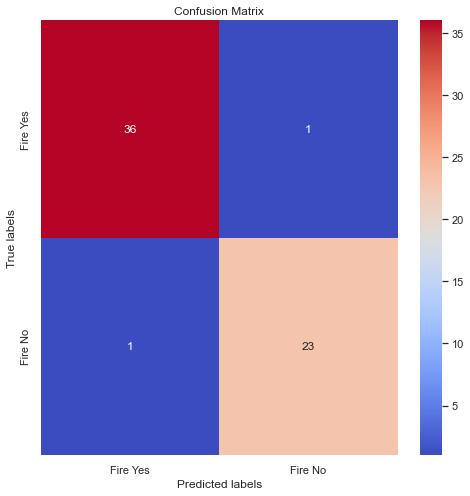

In [104]:
## Predicting the test results of Bagging Classifier
y_predict_bag = bag_clf.predict(X_test)
y_predict_bag
cm_bag_predict = confusion_matrix(y_test, y_predict_bag)


ax = plt.subplot()


sns.heatmap(cm_bag_predict, annot=True, ax = ax, fmt = '', cmap = 'coolwarm'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fire Yes', 'Fire No']); ax.yaxis.set_ticklabels(['Fire Yes', 'Fire No']);

In [105]:
print(classification_report(y_test, y_predict_bag))

              precision    recall  f1-score   support

        fire       0.97      0.97      0.97        37
     notfire       0.96      0.96      0.96        24

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



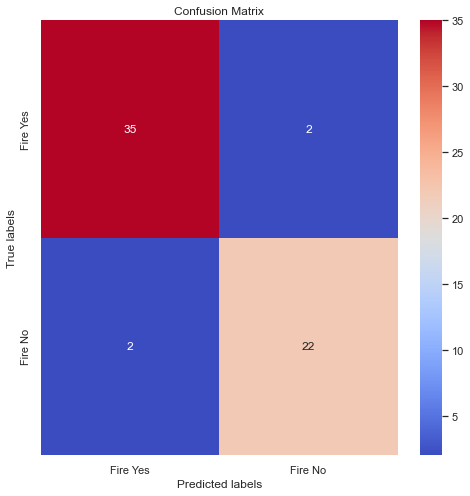

In [106]:
## Predicting the test results of Bagging Classifier
y_predict_extra = extra_clf.predict(X_test)
y_predict_extra
cm_extra_predict = confusion_matrix(y_test, y_predict_extra)


ax = plt.subplot()


sns.heatmap(cm_extra_predict, annot=True, ax = ax, fmt = '', cmap = 'coolwarm'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fire Yes', 'Fire No']); ax.yaxis.set_ticklabels(['Fire Yes', 'Fire No']);

In [107]:
print(classification_report(y_test, y_predict_extra))

              precision    recall  f1-score   support

        fire       0.95      0.95      0.95        37
     notfire       0.92      0.92      0.92        24

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



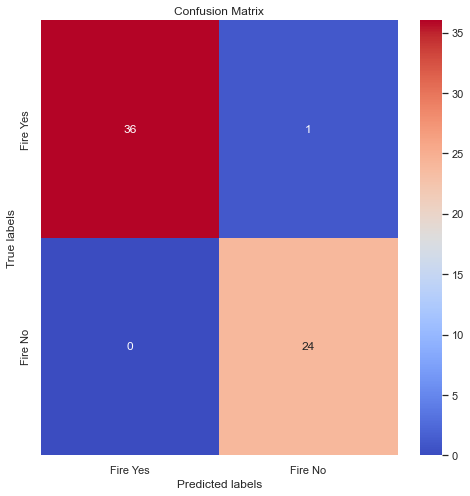

In [108]:
## Predicting the test results of Random Forest Classifier
y_predict_rf = random_clf.predict(X_test)
y_predict_rf
cm_rf_predict = confusion_matrix(y_test, y_predict_rf)


ax = plt.subplot()


sns.heatmap(cm_rf_predict, annot=True, ax = ax, fmt = '', cmap = 'coolwarm'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fire Yes', 'Fire No']); ax.yaxis.set_ticklabels(['Fire Yes', 'Fire No']);

In [109]:
print(classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

        fire       1.00      0.97      0.99        37
     notfire       0.96      1.00      0.98        24

    accuracy                           0.98        61
   macro avg       0.98      0.99      0.98        61
weighted avg       0.98      0.98      0.98        61



### So, Logistic Regression, Decision Tree and Random Forest are showing promising results. Now, Let's plot a roc-auc curve to select the best model for further processing.

### First Let's map y_test into numerical values

In [110]:
y_test_for_roc = y_test.map({"fire": 0, "notfire":1})

In [111]:
y.head()

0    notfire
1    notfire
2    notfire
3    notfire
4    notfire
Name: Classes, dtype: object

In [112]:
# predict probabilities
pred_prob1 = log_reg.predict_proba(X_test)
pred_prob2 = knears_neighbors.predict_proba(X_test)
pred_prob3 = svc.predict_proba(X_test)
pred_prob4 = tree_clf.predict_proba(X_test)
pred_prob5 = bag_clf.predict_proba(X_test)
pred_prob6 = extra_clf.predict_proba(X_test)
pred_prob7 = random_clf.predict_proba(X_test)

In [113]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test_for_roc, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test_for_roc, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test_for_roc, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test_for_roc, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test_for_roc, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test_for_roc, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test_for_roc, pred_prob7[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test_for_roc))]
p_fpr, p_tpr, _ = roc_curve(y_test_for_roc, random_probs, pos_label=1)

In [114]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test_for_roc, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_for_roc, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test_for_roc, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test_for_roc, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test_for_roc, pred_prob5[:,1])
auc_score6 = roc_auc_score(y_test_for_roc, pred_prob6[:,1])
auc_score7 = roc_auc_score(y_test_for_roc, pred_prob7[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4, auc_score5, auc_score6, auc_score7)

1.0 0.9301801801801801 0.9966216216216217 0.999436936936937 0.9977477477477478 0.9921171171171171 0.9966216216216216


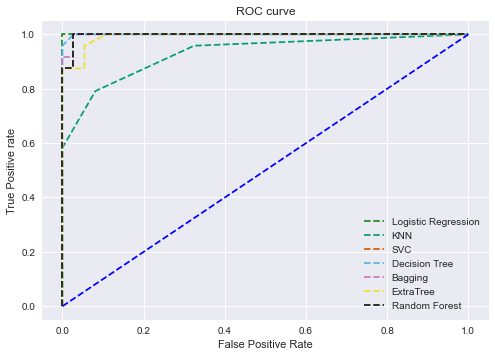

In [115]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='forestgreen', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='g', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='r', label='SVC')
plt.plot(fpr4, tpr4, linestyle='--',color='c', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='--',color='m', label='Bagging')
plt.plot(fpr6, tpr6, linestyle='--',color='y', label='ExtraTree')
plt.plot(fpr7, tpr7, linestyle='--',color='k', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### According to Auc-roc curve, Logistic Regression is best having 100% probability, second one is Support vector, and third one is K-nearest neighbor.

#### So, we will save the logistic regression here

In [116]:
import pickle
# save the model to disk
filename = 'finalized_model_logistic.pkl'
pickle.dump(log_reg, open(filename, 'wb'))

In [117]:
X_test.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,FWI
24,1.046955,-1.350168,-0.318255,0.132376,-0.176015,-0.381657,0.618545,-0.038865,0.183780
6,-0.992858,-1.350168,0.234145,-0.543409,-0.888877,-0.381657,0.723293,-0.386550,0.022169
152,-1.672796,-0.451289,-1.146855,-0.273095,0.893277,0.718849,-0.987591,-0.928292,-0.880159
232,0.480340,1.346468,0.510345,-0.273095,-0.888877,-0.281611,0.115754,0.324992,-0.435729
238,1.160278,1.346468,-0.594455,0.199954,-0.532446,-0.381657,0.527763,0.106678,-0.072104


In [118]:
# load the model from disk
with open('finalized_model_logistic.pkl.' , 'rb') as f:
    log = pickle.load(f)

In [119]:
log.score(X_test, y_test)

0.9836065573770492

In [120]:
pd.DataFrame(log.predict(X_test), y_test)

,0
Classes,
fire,fire
fire,fire
notfire,notfire
notfire,notfire
fire,fire
notfire,notfire
fire,fire
fire,fire
notfire,notfire


In [121]:
# save second model to disk
filename = 'finalized_model_decision_tree.pkl'
pickle.dump(log_reg, open(filename, 'wb'))

In [122]:
# load the model from disk
with open('finalized_model_decision_tree.pkl' , 'rb') as f:
    dt = pickle.load(f)

In [123]:
dt.score(X_test, y_test)

0.9836065573770492

In [124]:
pd.DataFrame(dt.predict(X_test), y_test)

,0
Classes,
fire,fire
fire,fire
notfire,notfire
notfire,notfire
fire,fire
notfire,notfire
fire,fire
fire,fire
notfire,notfire


## Saving the cleaned dataset into CSV format, on whic we have performed data engineering

## Combining X and y into a single csv file

In [125]:
X.shape

(243, 9)

In [126]:
y.shape

(243,)

In [127]:
X = X.join(y)

In [128]:
Algerian_cleaned_dataset = X

In [129]:
# saving the dataframe
Algerian_cleaned_dataset.to_csv('Algerian_cleaned_dataset.csv', index = False)

# Now applying regression by using all cleaned dataset. This time Temperature will be dependent column and the rest will be independent columns

In [130]:
## Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

C:\Users\Rohit\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [190]:
df1 = pd.read_csv("Algerian_cleaned_dataset.csv")
df1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,FWI,Classes
0,1.0,6.0,29.0,57.0,18.0,0.0,65.7,3.4,0.5,notfire
1,2.0,6.0,29.0,61.0,13.0,1.3,64.4,4.1,0.4,notfire
2,3.0,6.0,26.0,82.0,22.0,13.1,47.1,2.5,0.1,notfire
3,4.0,6.0,25.0,89.0,13.0,2.5,28.6,1.3,0.0,notfire
4,5.0,6.0,27.0,77.0,16.0,0.0,64.8,3.0,0.5,notfire


In [191]:
## Dividing the data into X and y

X1 = df1[['day', 'month', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'FWI', 'Classes']]
y = df1['Temperature']

In [192]:
X1.shape

(243, 9)

In [193]:
y.shape

(243,)

In [194]:
X1.head()

,day,month,RH,Ws,Rain,FFMC,DMC,FWI,Classes
0,1.0,6.0,57.0,18.0,0.0,65.7,3.4,0.5,notfire
1,2.0,6.0,61.0,13.0,1.3,64.4,4.1,0.4,notfire
2,3.0,6.0,82.0,22.0,13.1,47.1,2.5,0.1,notfire
3,4.0,6.0,89.0,13.0,2.5,28.6,1.3,0.0,notfire
4,5.0,6.0,77.0,16.0,0.0,64.8,3.0,0.5,notfire


In [195]:
y.head()

0    29.0
1    29.0
2    26.0
3    25.0
4    27.0
Name: Temperature, dtype: float64

In [196]:
## Label encode the Classes column
le = LabelEncoder()
X1['Classes'] = le.fit_transform(X1.Classes.values)

C:\Users\Rohit\AppData\Local\Temp\ipykernel_18396\3849733629.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [197]:
X1.head()

,day,month,RH,Ws,Rain,FFMC,DMC,FWI,Classes
0,1.0,6.0,57.0,18.0,0.0,65.7,3.4,0.5,1
1,2.0,6.0,61.0,13.0,1.3,64.4,4.1,0.4,1
2,3.0,6.0,82.0,22.0,13.1,47.1,2.5,0.1,1
3,4.0,6.0,89.0,13.0,2.5,28.6,1.3,0.0,1
4,5.0,6.0,77.0,16.0,0.0,64.8,3.0,0.5,1


In [200]:
## Cleaned dataset for regresion
Cleaned_dataset = X1.join(y)

In [202]:
Cleaned_dataset.head()

,day,month,RH,Ws,Rain,FFMC,DMC,FWI,Classes,Temperature
0,1.0,6.0,57.0,18.0,0.0,65.7,3.4,0.5,1,29.0
1,2.0,6.0,61.0,13.0,1.3,64.4,4.1,0.4,1,29.0
2,3.0,6.0,82.0,22.0,13.1,47.1,2.5,0.1,1,26.0
3,4.0,6.0,89.0,13.0,2.5,28.6,1.3,0.0,1,25.0
4,5.0,6.0,77.0,16.0,0.0,64.8,3.0,0.5,1,27.0


In [204]:
# saving the dataframe
Cleaned_dataset.to_csv('Cleaned_dataset.csv', index = False)

In [139]:
scaler3 = RobustScaler()
robust_df1 = scaler3.fit_transform(X1)
robust_df1 = pd.DataFrame(robust_df1, columns = ['day', 'month', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'FWI', 'Classess'])

In [140]:
robust_df1.head()

,day,month,RH,Ws,Rain,FFMC,DMC,FWI,Classess
0,-1.000000,-2.0,-0.285714,1.000000,0.0,-1.069909,-0.526667,-0.344186,1.0
1,-0.933333,-2.0,-0.095238,-0.666667,2.6,-1.148936,-0.480000,-0.353488,1.0
2,-0.866667,-2.0,0.904762,2.333333,26.2,-2.200608,-0.586667,-0.381395,1.0
3,-0.800000,-2.0,1.238095,-0.666667,5.0,-3.325228,-0.666667,-0.390698,1.0
4,-0.733333,-2.0,0.666667,0.333333,0.0,-1.124620,-0.553333,-0.344186,1.0


In [141]:
scaler4 = StandardScaler()
X_scaled1 = scaler4.fit_transform(robust_df1)
X_scaled1 = pd.DataFrame(X_scaled1, columns = ['day', 'month', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'FWI', 'Classess'])

In [142]:
X_scaled1.head()

,day,month,RH,Ws,Rain,FFMC,DMC,FWI,Classess
0,-1.672796,-1.350168,-0.340673,0.893277,-0.381657,-0.847927,-0.912120,-0.880159,1.136861
1,-1.559473,-1.350168,-0.070359,-0.888877,0.268642,-0.938709,-0.855520,-0.893626,1.136861
2,-1.446150,-1.350168,1.348788,2.319000,6.171355,-2.146802,-0.984891,-0.934029,1.136861
3,-1.332827,-1.350168,1.821837,-0.888877,0.868918,-3.438694,-1.081920,-0.947497,1.136861
4,-1.219504,-1.350168,1.010896,0.180416,-0.381657,-0.910776,-0.944463,-0.880159,1.136861


In [189]:
X1.head()

,day,month,RH,Ws,FFMC,FWI
0,1.0,6.0,57.0,18.0,65.7,0.5
1,2.0,6.0,61.0,13.0,64.4,0.4
2,3.0,6.0,82.0,22.0,47.1,0.1
3,4.0,6.0,89.0,13.0,28.6,0.0
4,5.0,6.0,77.0,16.0,64.8,0.5


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled1, y, test_size=0.25, random_state=42)

### Now using algorithms for regression purpose

In [144]:
models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
models.append(('XGBREGRESSOR', xgb.XGBRegressor()))

In [145]:
# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    # Evaluate the model
    score = explained_variance_score(y_test, predictions) # It should not be less than 60%
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f) (%f) (%f)" % (name, score, mae, mse, r2)
    print(msg)

LiR: 0.453102 (2.009547) (6.256188) (0.453102)
Ridge: 0.455598 (2.005720) (6.227645) (0.455597)
Lasso: 0.430983 (2.130749) (6.510682) (0.430855)
ElasticNet: 0.455153 (2.037177) (6.234383) (0.455008)
Bag_Re: 0.532623 (1.834426) (5.432623) (0.525095)
RandomForest: 0.623660 (1.582787) (4.341330) (0.620493)
ExtraTreesRegressor: 0.633427 (1.628197) (4.246807) (0.628756)
KNN: 0.542775 (1.845902) (5.236066) (0.542278)
CART: 0.407038 (2.016393) (6.901639) (0.396678)
SVM: 0.580819 (1.631543) (4.825409) (0.578176)


C:\Users\Rohit\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



XGBREGRESSOR: 0.607088 (1.663385) (4.524336) (0.604495)


## Here Extra trees classifier is giving the best score 6. 1 and mse of 4.37 closer to zero than others...

* After this point even after doing fine tuning and explicit outliers handling, brining skewness under more control, the models were unable to predict better than this one as can be seen below, so we will be saving this model.

In [146]:
et_regressor = ExtraTreesRegressor().fit(X_train, y_train)

In [147]:
predictions_et = et_regressor.predict(X_test)

In [148]:
mean_squared_error(y_test, predictions_et)

4.37208524590164

In [149]:
r2_score(y_test, predictions_et)

0.6178046046140112

In [ ]:
predictions_et.red

In [150]:
# save second model to disk
filename = 'finalized_model_extra_tree_regressor.pkl'
pickle.dump(et_regressor, open(filename, 'wb'))

In [152]:
# load the model from disk
with open('finalized_model_extra_tree_regressor.pkl' , 'rb') as f:
    et_reg = pickle.load(f)

In [157]:
pd.DataFrame(et_reg.predict(X_test), y_test)

,0
Temperature,
31.0,33.62
33.0,31.28
28.0,30.02
34.0,31.12
30.0,30.81
39.0,32.92
28.0,30.11
37.0,33.79
28.0,30.02


In [ ]:
et_reg.

## Let's try to increase the predictions by tuning the hyperparameters

In [158]:
from sklearn.model_selection import GridSearchCV

In [159]:
# Logistic Regression 
linear_reg_params = {'normalize' : [True, False]}

grid_linear_reg = GridSearchCV(LinearRegression(), linear_reg_params, scoring='neg_mean_squared_error',
                           return_train_score=True, cv = 10)
grid_linear_reg.fit(X_train, y_train)
# We automatically get the linear regression with the best parameters.
linear_reg = grid_linear_reg.best_estimator_


# Ridge regression
ridge_reg_params = {'alpha' : [1,2,3,4,5,6,7,8,9,10], 
                    'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}
grid_ridge_reg = GridSearchCV(Ridge(), ridge_reg_params, scoring='neg_mean_squared_error',
                           return_train_score=True, cv = 10)


grid_ridge_reg.fit(X_train, y_train)

# best parameters
ridge_clf = grid_ridge_reg.best_estimator_

# Lasso regression
lasso_reg_parameters = {'alpha' : [1,2,3,4,5,6,7,8,9,10],'selection':['cyclic', 'random'], 'warm_start': [True, False]}
grid_lasso_reg = GridSearchCV(Lasso(), lasso_reg_parameters, scoring='neg_mean_squared_error',
                           return_train_score=True, cv = 10)
grid_lasso_reg.fit(X_train,y_train)

# best parameters
lasso_clf = grid_lasso_reg.best_estimator_

# elastic net
elastic_net_params = {'alpha' : [1,2,3,4,5,6,7,8,9,10], 'fit_intercept': [True, False], 'selection':['cyclic', 'random']}
grid_elastic_reg = GridSearchCV(ElasticNet(), elastic_net_params,  scoring='neg_mean_squared_error',
                           return_train_score=True, cv = 10)

grid_elastic_reg.fit(X_train, y_train)

# best parameters
elastic_clf = grid_elastic_reg.best_estimator_

kreg_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_kreg = GridSearchCV(KNeighborsRegressor(), knears_params, scoring='neg_mean_squared_error',
                           return_train_score=True, cv = 10)
grid_kreg.fit(X_train, y_train)
# KNears best estimator
kreg_neighbors = grid_kreg.best_estimator_

# Support Vector Regressor
svr_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 'epsilon': [0.2, 0.2,0.1],
             'gamma' : ['scale', 'auto']}
grid_svr = GridSearchCV(SVC(probability = True), svc_params,scoring='neg_mean_squared_error',
                           return_train_score=True, cv = 10)
grid_svr.fit(X_train, y_train)

# SVC best estimator
svr_clf = grid_svr.best_estimator_

# DecisionTree Regressor
DR_params = {"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1)), 'max_features': [2, 4, 6, 8],
               'max_features': [2, 3, 4], "splitter": ["best", "random"]}

grid_DR = GridSearchCV(DecisionTreeRegressor(), DR_params,
            scoring='neg_mean_squared_error',
                           return_train_score=True, cv = 10)
grid_DR.fit(X_train, y_train)

# Decisiontree best estimator
DR_clf = grid_DR.best_estimator_

# Bagging Regressor
bagr_parameters = {"base_estimator": [SVR(), RandomForestRegressor(), DecisionTreeRegressor()],
                 "n_estimators": [10,20,30,40,50,60,70,80,90,100]}
grid_bagr = GridSearchCV(BaggingRegressor(), bagr_parameters , 
                  scoring='neg_mean_squared_error',
                           return_train_score=True, cv = 10)
grid_bagr.fit(X_train, y_train)

# Bag best parameters
bagr_clf = grid_bag.best_estimator_


# Extra Trees Regressor
extraR_parameters = {"criterion": ["squared_error", "absolute_error"],
                   'n_estimators':list(range(1,100,1))}
extraR_bag = GridSearchCV(ExtraTreesRegressor(), extraR_parameters ,
                    scoring='neg_mean_squared_error',
                           return_train_score=True, cv = 10)
extraR_bag.fit(X_train, y_train)

# Extra tree best parameter
extraR_clf = extra_bag.best_estimator_

# Random Forest Regressor
RandomR_parameters = {"criterion": ['squared_error', 'absolute_error', 'poisson'],
                     "n_estimators":list(range(1,100,1)),
                     "min_samples_leaf": list(range(5,7,1)),
                     "max_depth": list(range(2,4,1)),
                    "max_features" : ['sqrt', 'log2', None]}

RandomR_bag = GridSearchCV(RandomForestRegressor(), RandomR_parameters,scoring='neg_mean_squared_error',
                           return_train_score=True, cv = 10)
RandomR_bag.fit(X_train, y_train)

# random forest best parameter
randomR_clf = Random_bag.best_estimator_



C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)



C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline

## Retraining of the models with fine tuned parameters

### Get the best parameters one by one

In [160]:
linear_reg

LinearRegression(normalize=False)

In [161]:
ridge_clf

Ridge(alpha=10, solver='saga')

In [162]:
lasso_clf

Lasso(alpha=1, warm_start=True)

In [163]:
elastic_clf

ElasticNet(alpha=1, selection='random')

In [164]:
kreg_neighbors

KNeighborsRegressor(n_neighbors=4)

In [165]:
svr_clf

SVC(C=0.7, kernel='linear', probability=True)

In [166]:
DR_clf

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_features=2,
                      min_samples_leaf=6)

In [167]:
bagr_clf

BaggingClassifier(base_estimator=RandomForestClassifier())

In [168]:
extraR_clf

ExtraTreesClassifier(n_estimators=16)

In [169]:
randomR_clf

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=44)

In [170]:
modelss = []
modelss.append(('LiR', LinearRegression(normalize=False)))
modelss.append(('Ridge', Ridge(alpha=10, solver='saga')))
modelss.append(('Lasso', Lasso(alpha=1, selection='random', warm_start=True)))
modelss.append(('ElasticNet', ElasticNet(alpha=1)))
modelss.append(('Bag_Re', 
            BaggingRegressor(base_estimator=RandomForestClassifier(n_estimators=40))))
modelss.append(('RandomForest', RandomForestRegressor(max_depth=2, min_samples_leaf=5, n_estimators=16)))
modelss.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
modelss.append(('KNN', KNeighborsRegressor(n_neighbors=4)))
modelss.append(('CART', DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_features=3,
                      min_samples_leaf=5)))
modelss.append(('SVR', SVR(C=0.7, kernel='linear')))

In [171]:
# Evaluations
results = []
names = []
scoring = []

for name, model in modelss:
    # Fit the model
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    # Evaluate the model
    score = explained_variance_score(y_test, predictions) # It should not be less than 60%
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f) (%f) (%f)" % (name, score, mae, mse, r2)
    print(msg)

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.



LiR: 0.453102 (2.009547) (6.256188) (0.453102)
Ridge: 0.471483 (1.980403) (6.046182) (0.471460)
Lasso: 0.430953 (2.130636) (6.511028) (0.430824)
ElasticNet: 0.455153 (2.037177) (6.234383) (0.455008)
Bag_Re: 0.525372 (1.752459) (5.429672) (0.525353)
RandomForest: 0.476340 (1.999878) (6.002984) (0.475236)
ExtraTreesRegressor: 0.622375 (1.655574) (4.372854) (0.617737)
KNN: 0.559422 (1.782787) (5.039959) (0.559421)
CART: 0.417161 (2.141438) (7.114636) (0.378059)
SVR: 0.490611 (1.916283) (5.838411) (0.489623)


## The accuracy actually decreased. So, now lets try some other ways.

C:\Users\Rohit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Classes', ylabel='Rain'>

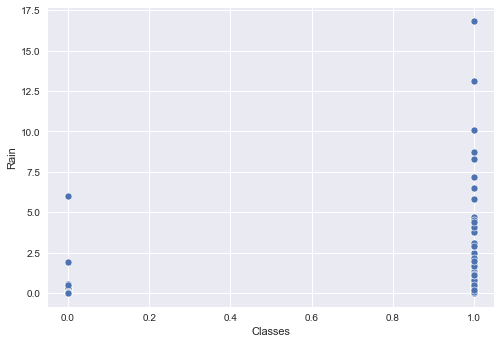

In [172]:
sns.scatterplot(X1.Classes, X1.Rain)

In [173]:
X1.corr()

,day,month,RH,Ws,Rain,FFMC,DMC,FWI,Classes
day,1.000000,-0.000369,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.350781,-0.202840
month,-0.000369,1.000000,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.082639,-0.024004
RH,-0.076034,-0.041252,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.580957,0.432161
Ws,0.047812,-0.039880,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.032368,0.069964
Rain,-0.112523,0.034822,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.324422,0.379097
FFMC,0.224956,0.017030,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.691132,-0.769492
DMC,0.491514,0.067943,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875864,-0.585658
FWI,0.350781,0.082639,-0.580957,0.032368,-0.324422,0.691132,0.875864,1.000000,-0.719216
Classes,-0.202840,-0.024004,0.432161,0.069964,0.379097,-0.769492,-0.585658,-0.719216,1.000000


In [174]:
X_ols_input_new4 = sm.add_constant(X1)
model = sm.OLS(y, X_ols_input_new4).fit()

In [175]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     35.80
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           2.78e-39
Time:                        12:00:51   Log-Likelihood:                -551.95
No. Observations:                 243   AIC:                             1124.
Df Residuals:                     233   BIC:                             1159.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6865      2.917     11.890      0.000      28.939      40.434
day           -0.0373      0.020     -1.825      0.069      -0.078       0.003
month         -0.3204      0.139     -2.299      0.022      -0.595      -0.046
RH            -0.0716      0.017     -4.301      0.000      -0.104      -0.039
Ws            -0.2063      0.060     -3.420      0.001      -0.325      -0.087
Rain           0.0327      0.095      0.342      0.733      -0.155       0.221
FFMC           0.0915      0.023      3.917      0.000       0.045       0.137
DMC            0.0381      0.030      1.261      0.209      -0.021       0.098
FWI            0.0473      0.060      0.785      0.433      -0.071       0.166
Classes        0.1329      0.575      0.231      0.817      -1.000       1.265
==============================================================================
Omnibus:                        5.319   Durbin-Watson:                   0.955
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                5.046
Skew:                          -0.344   Prob(JB):                       0.0802
Kurtosis:                       3.156   Cond. No.                     1.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## we will be removing rain and classes based on P-value

In [176]:
X1 = X1.drop(labels = "Rain", axis = 1) # Done for now

In [177]:
X1 = X1.drop(labels = "Classes", axis = 1)

In [178]:
X_ols_input_new5 = sm.add_constant(X1)
model = sm.OLS(y, X_ols_input_new5).fit()

In [179]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     46.37
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           6.42e-41
Time:                        12:00:51   Log-Likelihood:                -552.03
No. Observations:                 243   AIC:                             1120.
Df Residuals:                     235   BIC:                             1148.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.3149      2.278     15.505      0.000      30.828      39.802
day           -0.0372      0.020     -1.826      0.069      -0.077       0.003
month         -0.3170      0.139     -2.287      0.023      -0.590      -0.044
RH            -0.0740      0.015     -4.891      0.000      -0.104      -0.044
Ws            -0.2020      0.059     -3.419      0.001      -0.318      -0.086
FFMC           0.0854      0.017      5.168      0.000       0.053       0.118
DMC            0.0402      0.029      1.378      0.169      -0.017       0.098
FWI            0.0400      0.053      0.753      0.452      -0.065       0.145
==============================================================================
Omnibus:                        5.548   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                5.272
Skew:                          -0.351   Prob(JB):                       0.0716
Kurtosis:                       3.169   Cond. No.                     1.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Applying models one more time

In [180]:
modelsss = []
modelsss.append(('LiR', LinearRegression()))
modelsss.append(('Ridge', Ridge()))
modelsss.append(('Lasso', Lasso()))
modelsss.append(('ElasticNet', ElasticNet()))
modelsss.append(('Bag_Re', BaggingRegressor()))
modelsss.append(('RandomForest', RandomForestRegressor()))
modelsss.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
modelsss.append(('KNN', KNeighborsRegressor()))
modelsss.append(('CART', DecisionTreeRegressor()))
modelsss.append(('SVR', SVR()))

In [181]:
# Evaluations
results = []
names = []
scoring = []

for name, model in modelsss:
    # Fit the model
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    # Evaluate the model
    score = explained_variance_score(y_test, predictions) # It should not be less than 60%
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f) (%f) (%f)" % (name, score, mae, mse, r2)
    print(msg)

LiR: 0.453102 (2.009547) (6.256188) (0.453102)
Ridge: 0.455598 (2.005720) (6.227645) (0.455597)
Lasso: 0.430983 (2.130749) (6.510682) (0.430855)
ElasticNet: 0.455153 (2.037177) (6.234383) (0.455008)
Bag_Re: 0.636721 (1.608197) (4.249672) (0.628506)
RandomForest: 0.606714 (1.617049) (4.546777) (0.602534)
ExtraTreesRegressor: 0.617634 (1.636066) (4.434502) (0.612348)
KNN: 0.542775 (1.845902) (5.236066) (0.542278)
CART: 0.405723 (2.065574) (6.885246) (0.398111)
SVR: 0.580819 (1.631543) (4.825409) (0.578176)


In [182]:
X1.corr()

,day,month,RH,Ws,FFMC,DMC,FWI
day,1.000000,-0.000369,-0.076034,0.047812,0.224956,0.491514,0.350781
month,-0.000369,1.000000,-0.041252,-0.039880,0.017030,0.067943,0.082639
RH,-0.076034,-0.041252,1.000000,0.244048,-0.644873,-0.408519,-0.580957
Ws,0.047812,-0.039880,0.244048,1.000000,-0.166548,-0.000721,0.032368
FFMC,0.224956,0.017030,-0.644873,-0.166548,1.000000,0.603608,0.691132
DMC,0.491514,0.067943,-0.408519,-0.000721,0.603608,1.000000,0.875864
FWI,0.350781,0.082639,-0.580957,0.032368,0.691132,0.875864,1.000000


In [183]:
X1 = X1.drop(labels = "DMC", axis = 1)

In [184]:
X1.corr()

,day,month,RH,Ws,FFMC,FWI
day,1.000000,-0.000369,-0.076034,0.047812,0.224956,0.350781
month,-0.000369,1.000000,-0.041252,-0.039880,0.017030,0.082639
RH,-0.076034,-0.041252,1.000000,0.244048,-0.644873,-0.580957
Ws,0.047812,-0.039880,0.244048,1.000000,-0.166548,0.032368
FFMC,0.224956,0.017030,-0.644873,-0.166548,1.000000,0.691132
FWI,0.350781,0.082639,-0.580957,0.032368,0.691132,1.000000


In [185]:
modelssss = []
modelssss.append(('LiR', LinearRegression()))
modelssss.append(('Ridge', Ridge()))
modelssss.append(('Lasso', Lasso()))
modelssss.append(('ElasticNet', ElasticNet()))
modelssss.append(('Bag_Re', BaggingRegressor()))
modelssss.append(('RandomForest', RandomForestRegressor()))
modelssss.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
modelssss.append(('KNN', KNeighborsRegressor()))
modelssss.append(('CART', DecisionTreeRegressor()))
modelssss.append(('SVR', SVR()))

In [186]:
# Evaluations
results = []
names = []
scoring = []

for name, model in modelssss:
    # Fit the model
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    # Evaluate the model
    score = explained_variance_score(y_test, predictions) # It should not be less than 60%
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f) (%f) (%f)" % (name, score, mae, mse, r2)
    print(msg)

LiR: 0.453102 (2.009547) (6.256188) (0.453102)
Ridge: 0.455598 (2.005720) (6.227645) (0.455597)
Lasso: 0.430983 (2.130749) (6.510682) (0.430855)
ElasticNet: 0.455153 (2.037177) (6.234383) (0.455008)
Bag_Re: 0.572828 (1.709836) (4.918525) (0.570036)
RandomForest: 0.588737 (1.640984) (4.741895) (0.585477)
ExtraTreesRegressor: 0.620354 (1.657377) (4.393800) (0.615906)
KNN: 0.542775 (1.845902) (5.236066) (0.542278)
CART: 0.304515 (2.147541) (8.016393) (0.299229)
SVR: 0.580819 (1.631543) (4.825409) (0.578176)


### Let's try to take care of outliers in a more better way and see if the score increases

In [205]:
data = pd.read_csv("Cleaned_dataset.csv")

In [206]:
data.head()

,day,month,RH,Ws,Rain,FFMC,DMC,FWI,Classes,Temperature
0,1.0,6.0,57.0,18.0,0.0,65.7,3.4,0.5,1,29.0
1,2.0,6.0,61.0,13.0,1.3,64.4,4.1,0.4,1,29.0
2,3.0,6.0,82.0,22.0,13.1,47.1,2.5,0.1,1,26.0
3,4.0,6.0,89.0,13.0,2.5,28.6,1.3,0.0,1,25.0
4,5.0,6.0,77.0,16.0,0.0,64.8,3.0,0.5,1,27.0


### Skewness & Kurtosis

In [207]:
print("Skew: \n{}".format(data.skew()))
print("Kurtosis: \n{}".format(data.kurtosis()))

Skew: 
day            0.000365
month         -0.005207
RH            -0.242790
Ws             0.555586
Rain           4.568630
FFMC          -1.320130
DMC            1.522983
FWI            1.147593
Classes        0.258846
Temperature   -0.191327
dtype: float64
Kurtosis: 
day            -1.205600
month          -1.350272
RH             -0.508943
Ws              2.621704
Rain           25.822987
FFMC            1.040087
DMC             2.462551
FWI             0.654985
Classes        -1.949109
Temperature    -0.141414
dtype: float64


Skew is the degree of distortion from a normal distribution. skewed, meaning there are a minority of very large values.

Kurtosis is all about the tails of the distribution — not the peakedness or flatness. It is used to describe the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution . High kurtosis in a data set is an indicator that data has heavy tails or outliers.

If skewness is positive, the data are positively skewed or skewed right, meaning that the right tail of the distribution is longer than the left. If skewness is negative, the data are negatively skewed or skewed left, meaning that the left tail is longer.

* If skewness is less than −1 or greater than +1, the distribution is highly skewed.

* If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.

* If skewness is between −½ and +½, the distribution is approximately symmetric.


* A normal distribution has kurtosis exactly 3 (excess kurtosis exactly 0). Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic.

* A distribution with kurtosis <3 (excess kurtosis <0 ) is called platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.

* A distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.


    * Feature columns:- 'rain' has +ve skewness, value more than +1 so, it is right skewed.

    * Feature columns:- 'FFMC', & 'temp', 'RH', 'month' have -ve skewness, value less than -1 so, they are left skewed.

    * Feature columns:- 'Ws', 'Rain' has higher kurtosis value. i,e it has outliers.

In [210]:
data['Temperature'].unique()

array([29., 26., 25., 27., 31., 33., 30., 28., 32., 34., 35., 36., 37.,
       22., 24., 38., 39., 40., 42.])

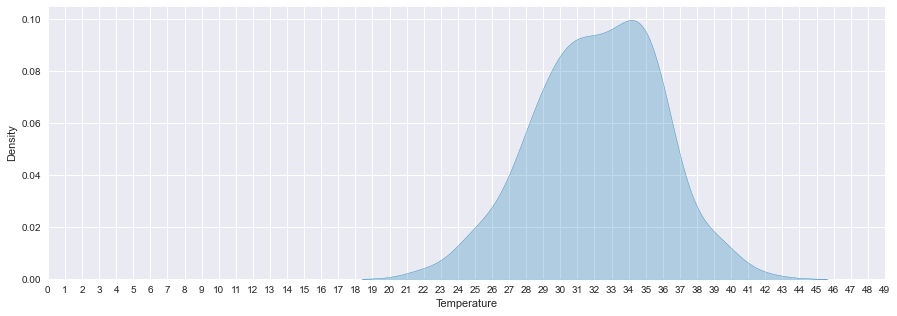

In [211]:
plt.figure(figsize=(15,5))
ax = sns.kdeplot(data['Temperature'],shade=True,color='b')
plt.xticks([i for i in range(0,50)])
plt.show()

Temperature is left skewed

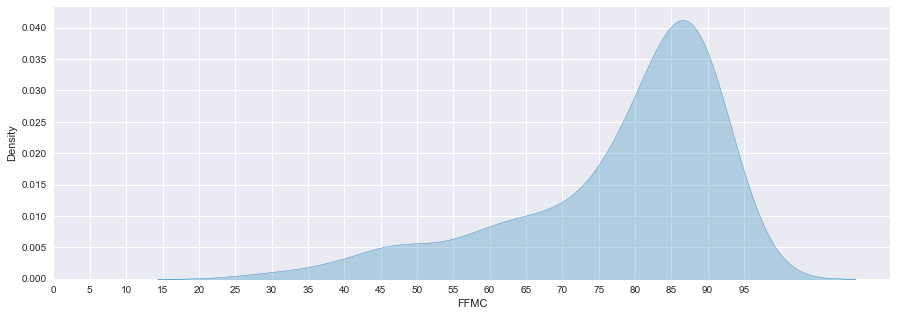

In [215]:
plt.figure(figsize=(15,5))
ax = sns.kdeplot(data['FFMC'],shade=True,color='b')
plt.xticks([i for i in range(0,100,5)])
plt.show()

FFMC is left skewed

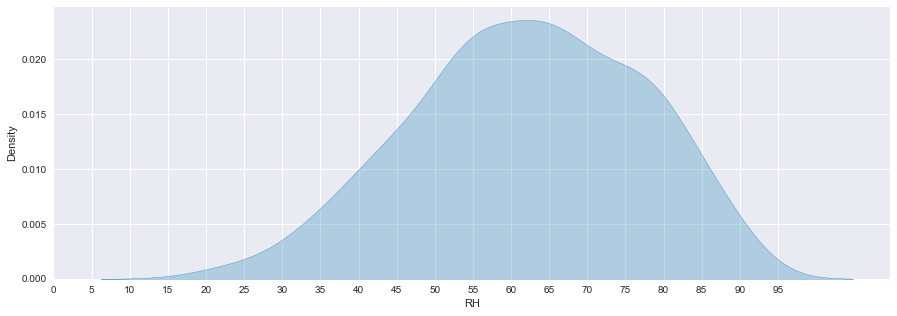

In [216]:
plt.figure(figsize=(15,5))
ax = sns.kdeplot(data['RH'],shade=True,color='b')
plt.xticks([i for i in range(0,100,5)])
plt.show()

RH is left skewed

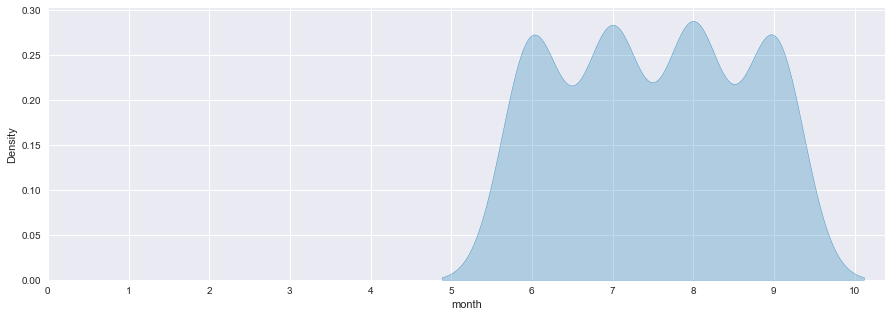

In [217]:
plt.figure(figsize=(15,5))
ax = sns.kdeplot(data['month'],shade=True,color='b')
plt.xticks([i for i in range(0,11)])
plt.show()

month is having a multimodal peaks

In [218]:
df.Rain.unique().max()

'8.7'

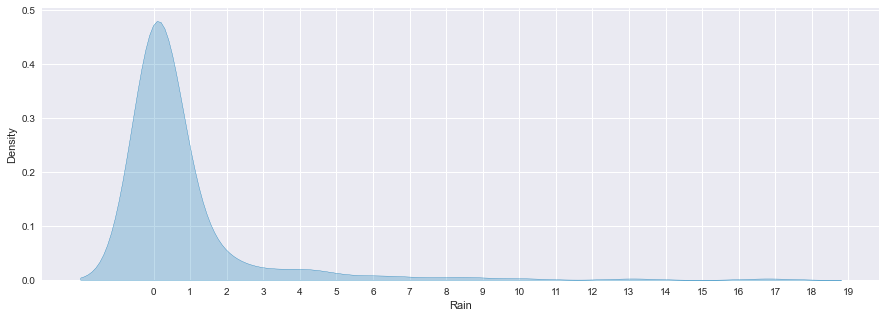

In [220]:
plt.figure(figsize=(15,5))
ax = sns.kdeplot(data['Rain'],shade=True,color='b')
plt.xticks([i for i in range(0,20)])
plt.show()

Rain is Right skewed

Outliers detection

C:\Users\Rohit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



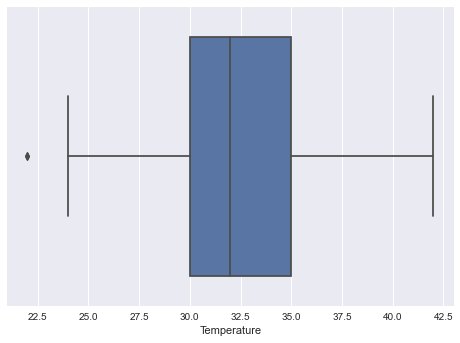

In [221]:
outl_dect = sns.boxplot(data['Temperature'])

C:\Users\Rohit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



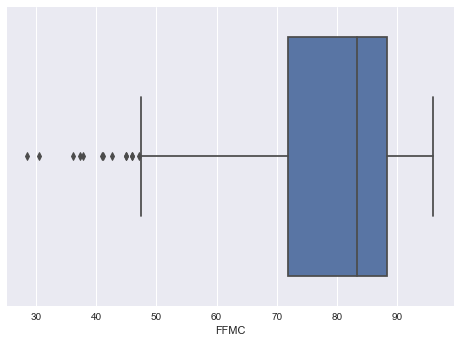

In [222]:
outl_dect = sns.boxplot(data['FFMC'])

C:\Users\Rohit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



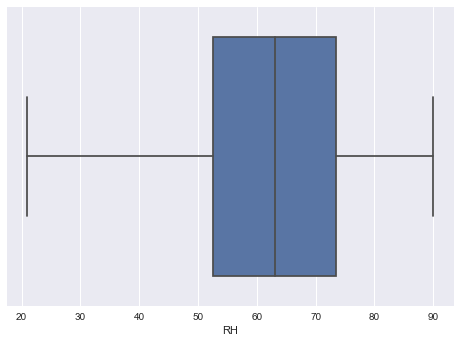

In [224]:
outl_dect = sns.boxplot(data['RH'])

C:\Users\Rohit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



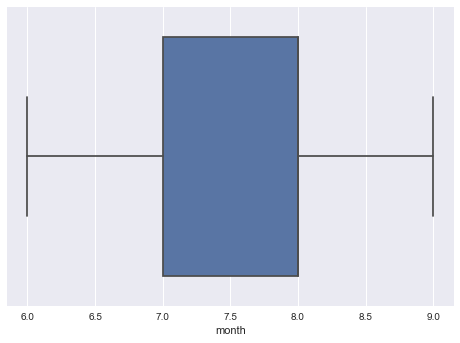

In [225]:
outl_dect = sns.boxplot(data['month'])

C:\Users\Rohit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



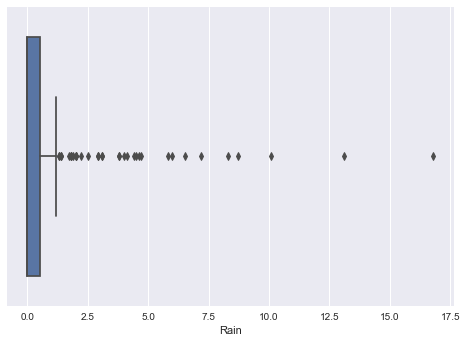

In [226]:
outl_dect = sns.boxplot(data['Rain'])

### Instead of removing them we will transform the data to treat the outliers.

In [227]:
outlier_columns = ['Temperature','FFMC','Rain']

### reducing skewness by log distribution

In [229]:
np.log1p(data[outlier_columns]).skew()

Temperature   -0.503859
FFMC          -1.837617
Rain           2.207224
dtype: float64

In [230]:
np.log1p(data[outlier_columns]).kurtosis()

Temperature    0.191311
FFMC           3.329783
Rain           4.602274
dtype: float64

### Removing outliers by zscore method

In [232]:
mask = data.loc[:,['FFMC']].apply(zscore).abs() < 3

In [233]:
# Since most of the values in rain are 0.0, we can convert it as a categorical column
data['Rain'] = data['Rain'].apply(lambda x: int(x > 0.0))

In [234]:
outlier_columns.remove('Rain')
data[outlier_columns] = np.log1p(data[outlier_columns])

In [235]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [236]:
data[outlier_columns].skew()

Temperature   -0.503859
FFMC          -1.837617
dtype: float64

In [237]:
data[outlier_columns].kurtosis() 

Temperature    0.191311
FFMC           3.329783
dtype: float64

In [238]:
data.describe()

,day,month,RH,Ws,Rain,FFMC,DMC,FWI,Classes,Temperature
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,62.041152,15.493827,0.452675,4.346550,14.680658,7.035391,0.436214,3.494956
std,8.842552,1.114793,14.828160,2.811385,0.498783,0.218449,12.393040,7.440568,0.496938,0.112222
min,1.000000,6.000000,21.000000,6.000000,0.000000,3.387774,0.700000,0.000000,0.000000,3.135494
25%,8.000000,7.000000,52.500000,14.000000,0.000000,4.288383,5.800000,0.700000,0.000000,3.433987
50%,16.000000,8.000000,63.000000,15.000000,0.000000,4.434382,11.300000,4.200000,0.000000,3.496508
75%,23.000000,8.000000,73.500000,17.000000,1.000000,4.492001,20.800000,11.450000,1.000000,3.583519
max,31.000000,9.000000,90.000000,29.000000,1.000000,4.574711,65.900000,31.100000,1.000000,3.761200


In [240]:
data["Classes"].unique()

array([1, 0], dtype=int64)

## Copy data to final dataframe so that original data is not changed

In [241]:
final_df = data.copy()

In [242]:
final_df.head()

,day,month,RH,Ws,Rain,FFMC,DMC,FWI,Classes,Temperature
0,1.0,6.0,57.0,18.0,0,4.200205,3.4,0.5,1,3.401197
1,2.0,6.0,61.0,13.0,1,4.180522,4.1,0.4,1,3.401197
2,3.0,6.0,82.0,22.0,1,3.873282,2.5,0.1,1,3.295837
3,4.0,6.0,89.0,13.0,1,3.387774,1.3,0.0,1,3.258097
4,5.0,6.0,77.0,16.0,0,4.186620,3.0,0.5,1,3.332205


In [249]:
## Dividing the data into X_1 and y_1

X_1 = data[['day', 'month', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'FWI', 'Classes']]
y_1 = data['Temperature']

In [250]:
scaler_1 = StandardScaler()
X_scaled_1 = scaler_1.fit_transform(X_1)
X_scaled_1 = pd.DataFrame(X_scaled_1, columns = ['day', 'month','RH', 'Ws', 'Rain', 'FFMC',
       'DMC','FWI', 'Classes'])

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_1, y_1, test_size=0.25, random_state=42)

In [252]:
modelss = []
modelss.append(('LiR', LinearRegression()))
modelss.append(('Ridge', Ridge()))
modelss.append(('Lasso', Lasso()))
modelss.append(('ElasticNet', ElasticNet()))
modelss.append(('Bag_Re', BaggingRegressor()))
modelss.append(('RandomForest', RandomForestRegressor()))
modelss.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
modelss.append(('KNN', KNeighborsRegressor()))
modelss.append(('CART', DecisionTreeRegressor()))
modelss.append(('SVM', SVR()))

In [253]:
# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    # Evaluate the model
    score = explained_variance_score(y_test, predictions) # It should not be less than 60%
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f) (%f) (%f)" % (name, score, mae, mse, r2)
    print(msg)

LiR: 0.537540 (0.056367) (0.005024) (0.537435)
Ridge: 0.536402 (0.056389) (0.005036) (0.536326)
Lasso: 0.000000 (0.082735) (0.010891) (-0.002811)
ElasticNet: 0.000000 (0.082735) (0.010891) (-0.002811)
Bag_Re: 0.548192 (0.050684) (0.004957) (0.543585)
RandomForest: 0.588666 (0.052020) (0.004533) (0.582609)
ExtraTreesRegressor: 0.611079 (0.051572) (0.004300) (0.604086)
KNN: 0.560810 (0.057047) (0.004775) (0.560380)
CART: 0.356028 (0.062497) (0.007000) (0.355475)
SVM: 0.568681 (0.056575) (0.005049) (0.535127)
XGBREGRESSOR: 0.623270 (0.051976) (0.004218) (0.611631)


C:\Users\Rohit\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



## no difference

# Note: 

1. By applying the normal regression without fine tuning gave the highest r2 score, Extra Trees Regressor in this case. It seems like the model was not able to find the relations between the independent features.

2. But for classes cases each model prformed well, logistic gave 100% accuracy but still we took decision tree as 100% is still considered as overfitting.

    * so, we saved the Extra Trees Regressor model for the regression purpose.
    * and Decsision tree classifier model for the classification purpose
